# Preprocessing for real data sets

## List of data sets:

1. abalone
1. australian
1. banknote
1. breastcancer
1. cardiotocography
1. cmc
1. htru2
1. phoneme
1. ringnorm
1. texture
1. yeast

In [1]:
%load_ext lab_black

In [2]:
import os
from pathlib import Path

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

from label_flip_revised.utils import create_dir

In [3]:
PATH_DATA = os.path.join(Path(os.getcwd()).parent.parent, "data", "raw")
abspath = Path(PATH_DATA).absolute()
print(abspath)

/home/lukec/workspace/label_flip_revised/data/raw


## 1. Abalone

Read from `./data/raw/abalone.dat`

In [4]:
path_data = os.path.join(abspath, "abalone.dat")
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight",
    "Rings",
]
df = pd.read_csv(path_data, skiprows=13, names=cols, index_col=None, header=None)
print(df.shape)

(4174, 9)


In [5]:
print(df["Rings"].nunique())

print(len(df[df["Rings"] >= 10]))
print(len(df[df["Rings"] < 10]))

28
2080
2094


In [6]:
# Assign # of rings greater and equal to 10 as 1, less than 10 as 0
df["Class"] = (
    df["Rings"].apply(lambda x: 0 if x < 10 else 1).astype("category").cat.codes
)
df = df.drop(["Rings", "Sex"], axis=1)

# Only keep Male and Female classes
df = df[(df["Class"] == 0) | (df["Class"] == 1)]

print(df.shape)
df.head()

(4174, 8)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


<AxesSubplot:>

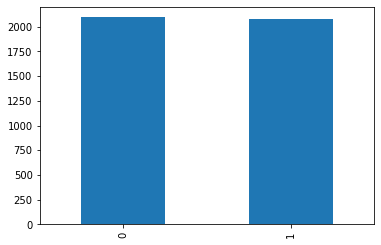

In [7]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

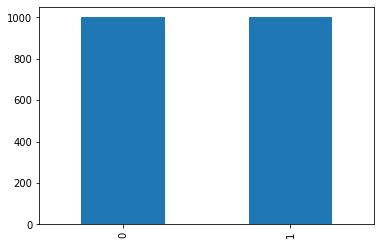

In [8]:
df0 = df[df["Class"] == 0].sample(1000, replace=False)
df1 = df[df["Class"] == 1].sample(1000, replace=False)
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [9]:
# Save data
path_output = os.path.join(Path(abspath).parent, "preprocessed")
create_dir(path_output)
path_output = os.path.join(path_output, "abalone_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/abalone_subset.csv


## 2. Australian

Read from `./data/raw/australian.dat`

In [10]:
path_data = os.path.join(abspath, "australian.dat")
col_names = ["A{}".format(i) for i in range(1, 15)] + ["Class"]
print(col_names)
df = pd.read_csv(path_data, sep="\s+", names=col_names, header=None)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'Class']
(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<AxesSubplot:>

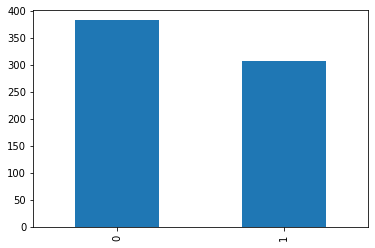

In [11]:
df["Class"].value_counts().plot(kind="bar")

In [12]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "australian.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/australian.csv


## 3. Banknote

Read from `./data/raw/banknote.csv`

In [13]:
path_data = os.path.join(abspath, "banknote.csv")
df = pd.read_csv(path_data)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1372, 5)


,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:>

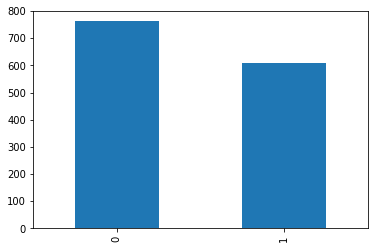

In [14]:
df["Class"].value_counts().plot(kind="bar")

In [15]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "banknote.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/banknote.csv


## 4. Breast Cancer

Read data from `sklearn.datasets`

In [16]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
col_names = dataset.feature_names

df = pd.DataFrame(X, columns=col_names)
df["Class"] = pd.Series(y, dtype="category").cat.codes

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

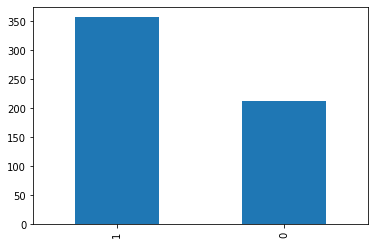

In [17]:
df["Class"].value_counts().plot(kind="bar")

In [18]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "breastcancer.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/breastcancer.csv


## 5. Cardiotocography

- Origional data: `./data/raw/cardiotocography.xls`
- Manually fixed: `./data/raw/cardiotocography_clean.xls`

In [19]:
path_data = os.path.join(abspath, "cardiotocography_clean.xls")
col_names = [
    "LB",
    "AC",
    "FM",
    "UC",
    "DL",
    "DS",
    "DP",
    "ASTV",
    "MSTV",
    "ALTV",
    "MLTV",
    "Width",
    "Min",
    "Max",
    "Nmax",
    "Nzeros",
    "Mode",
    "Mean",
    "Median",
    "Variance",
    "Tendency",
    "Class",
]
df = pd.read_excel(path_data, names=col_names, index_col=None)
print(df.shape)
df.head()

(2126, 22)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,9
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,6
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,6
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,6
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,2


<AxesSubplot:>

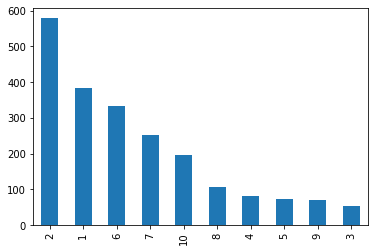

In [20]:
df["Class"].value_counts().plot(kind="bar")

In [21]:
cattype = CategoricalDtype(categories=list(range(1, 11)), ordered=True)
df["Class"] = df["Class"].astype(cattype).cat.codes

# Only keep Class 1 and 2
df = df[(df["Class"] == 0) | (df["Class"] == 1)]

print(df.shape)
df.head()

(963, 22)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Class
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
13,131,0.009,0.222,0.006,0.002,0.0,0.0,28,1.5,0,...,71,158,2,0,141,137,141,10,1,1
33,120,0.008,0.103,0.001,0.001,0.0,0.0,28,3.4,0,...,55,181,13,0,121,124,126,25,0,1
34,120,0.009,0.085,0.002,0.002,0.0,0.0,28,3.2,0,...,53,181,9,1,129,125,127,25,0,1
35,120,0.006,0.109,0.007,0.000,0.0,0.0,27,3.7,0,...,51,195,11,0,125,124,126,24,0,1


<AxesSubplot:>

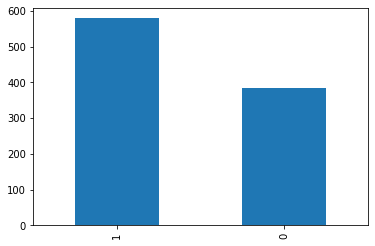

In [22]:
df["Class"].value_counts().plot(kind="bar")

In [23]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "cardiotocography.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/cardiotocography.csv


## 6. CMC

Read from: `./data/raw/cmc.data`

In [24]:
path_data = os.path.join(abspath, "cmc.data")
col_names = [
    "W_age",
    "W_edu",
    "H_edu",
    "Children",
    "W_religion",
    "W_work",
    "H_occ",
    "SoL",
    "Media",
    "Class",
]
df = pd.read_csv(path_data, index_col=None, header=None, names=col_names)
df["Class"] = df["Class"].astype("category").cat.codes
print(df.shape)
df.head()

(1473, 10)


,W_age,W_edu,H_edu,Children,W_religion,W_work,H_occ,SoL,Media,Class
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


<AxesSubplot:>

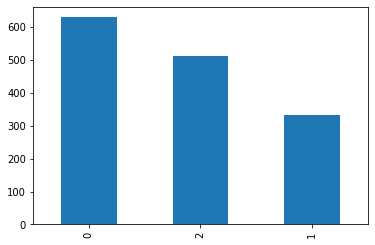

In [25]:
df["Class"].value_counts().plot(kind="bar")

Class attributes is **Contraceptive method used**. (1=No-use, 2=Long-term, 3=Short-term).
We merge 2 and 3.

In [26]:
df["Class"] = df["Class"].apply(lambda x: 0 if x == 1 else 1)

<AxesSubplot:>

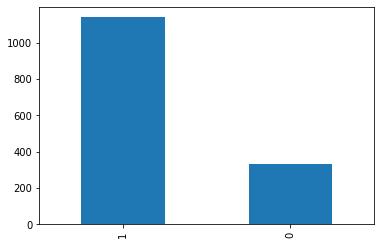

In [27]:
df["Class"].value_counts().plot(kind="bar")

In [28]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "cmc.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/cmc.csv


## 7. HTRU2

Read from: `./data/raw/HTRU_2.csv`

In [29]:
path_data = os.path.join(abspath, "HTRU_2.csv")
col_names = ["A{}".format(i) for i in range(1, 9)] + ["Class"]
df = pd.read_csv(path_data, names=col_names, index_col=None, header=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(17898, 9)


,A1,A2,A3,A4,A5,A6,A7,A8,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


<AxesSubplot:>

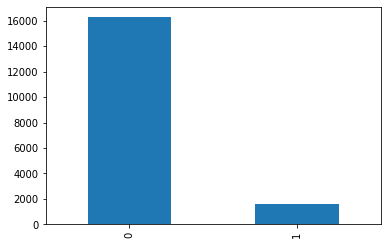

In [30]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

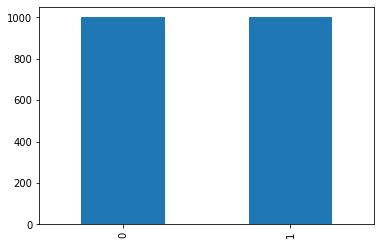

In [31]:
df0 = df[df["Class"] == 0].sample(1000, replace=False)
df1 = df[df["Class"] == 1].sample(1000, replace=False)
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [32]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "htru2_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/htru2_subset.csv


## 8. Phoneme

Read from: `./data/raw/phoneme.csv`

In [33]:
path_data = os.path.join(abspath, "phoneme.csv")
df = pd.read_csv(path_data, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5404, 6)


,V1,V2,V3,V4,V5,Class
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418,0
1,-0.641265,0.109245,0.292130,-0.916804,0.240223,0
2,0.870593,-0.459862,0.578159,0.806634,0.835248,0
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583,0
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127,0


<AxesSubplot:>

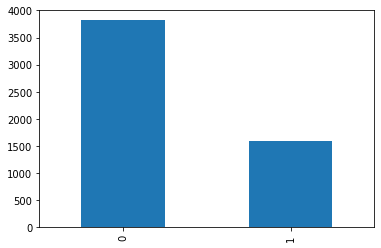

In [34]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

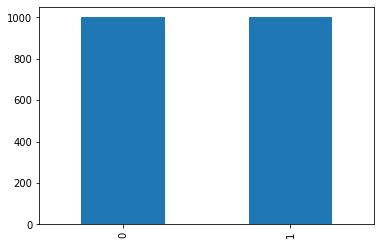

In [35]:
df0 = df[df["Class"] == 0].sample(1000, replace=False)
df1 = df[df["Class"] == 1].sample(1000, replace=False)
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [36]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "phoneme_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/phoneme_subset.csv


## 9. Ringnorm

Read from: `./data/raw/ringnorm.dat`

In [37]:
path_data = os.path.join(abspath, "ringnorm.dat")
col_names = ["A{}".format(i) for i in range(1, 21)] + ["Class"]
df = pd.read_csv(path_data, skiprows=26, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(7399, 21)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,Class
0,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
1,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
2,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
3,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
4,-258.0,-4696.0,-519.0,6469.0,-1878.0,-557.0,-62.0,5572.0,-62.0,1813.0,...,1299.0,-1926.0,61.0,-2941.0,-1953.0,-1007.0,-1042.0,1835.0,-1196.0,0


<AxesSubplot:>

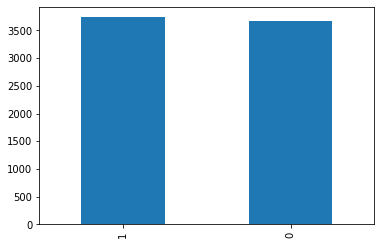

In [38]:
df["Class"].value_counts().plot(kind="bar")

<AxesSubplot:>

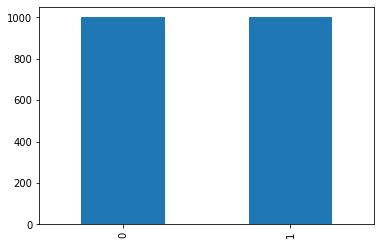

In [39]:
df0 = df[df["Class"] == 0].sample(1000, replace=False)
df1 = df[df["Class"] == 1].sample(1000, replace=False)
df = pd.concat([df0, df1])

df["Class"].value_counts().plot(kind="bar")

In [40]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "ringnorm_subset.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/ringnorm_subset.csv


## 10. Texture

Read from: `./data/raw/texture.dat`

In [41]:
path_data = os.path.join(abspath, "texture.dat")
col_names = ["A{}".format(i) for i in range(1, 41)] + ["Class"]
df = pd.read_csv(path_data, skiprows=45, names=col_names, header=None, index_col=None)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(5500, 41)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A32,A33,A34,A35,A36,A37,A38,A39,A40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,0
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,0
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,0
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,0
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,0


<AxesSubplot:>

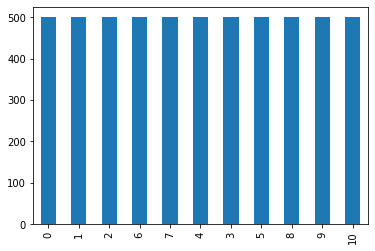

In [42]:
df["Class"].value_counts().plot(kind="bar")

To make it binary classification, only select class 3 and 9

(1000, 41)


<AxesSubplot:>

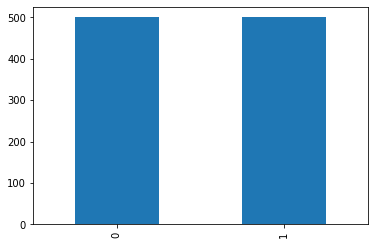

In [43]:
df = df[(df["Class"] == 3) | (df["Class"] == 9)]

# Remap classes
cattype = CategoricalDtype(categories=[3, 9], ordered=True)
df["Class"] = df["Class"].astype(cattype).cat.codes

print(df.shape)
df["Class"].value_counts().plot(kind="bar")

In [44]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "texture.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/texture.csv


## 11. Yeast

Read from: `./data/raw/yeast.dat`

In [45]:
path_data = os.path.join(abspath, "yeast.dat")
col_names = [
    "Mcg",
    "Gvh",
    "Alm",
    "Mit",
    "Erl",
    "Pox",
    "Vac",
    "Nuc",
    "Class",
]
output_names = [
    "MIT",
    "NUC",
    "CYT",
    "ME1",
    "ME2",
    "ME3",
    "EXC",
    "VAC",
    "POX",
    "ERL",
]
df = pd.read_csv(path_data, skiprows=13, names=col_names, header=None, index_col=None)
cattype = CategoricalDtype(categories=output_names, ordered=False)
df["Class"] = df["Class"].astype("category").cat.codes

print(df.shape)
df.head()

(1484, 9)


,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


<AxesSubplot:>

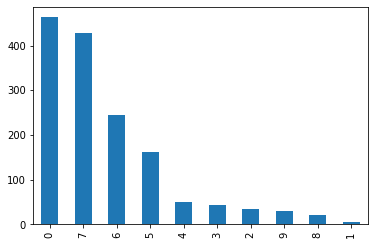

In [46]:
df["Class"].value_counts().plot(kind="bar")

(892, 9)


<AxesSubplot:>

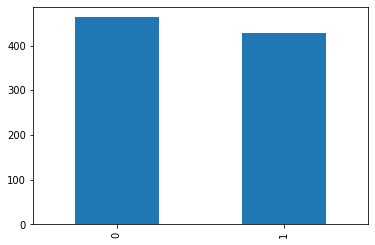

In [47]:
# Only select the major classes
df = df[(df["Class"] == 0) | (df["Class"] == 7)]

# Remap classes
cattype = CategoricalDtype(categories=[0, 7], ordered=True)
df["Class"] = df["Class"].astype(cattype).cat.codes

print(df.shape)
df["Class"].value_counts().plot(kind="bar")

In [48]:
path_output = os.path.join(Path(abspath).parent, "preprocessed", "yeast.csv")
print(f"Save to: {path_output}")
df.to_csv(path_output, index=False)

Save to: /home/lukec/workspace/label_flip_revised/data/preprocessed/yeast.csv
